## Phase covariant
Assuming a pre-jump state $|\psi> = \alpha|g>+\sqrt{1-\alpha^2}|e>$.
Unraveling with $$\mathbf C(\alpha,t) = 2\mu(\alpha,t)\sigma_+\sigma_- + [\gamma_z(t)-\mu(\alpha,t)]\mathbb 1, $$
where the part proportional to $\mathbb 1$ is just to diagonalize $\mathbf R_{|\psi><\psi|}$.
the eigenvalues of $\mathbf R_{|\psi><\psi|}$ are 

$$\lambda_1 = 2 \gamma_z(1-\alpha^2)+\gamma_+\alpha^2+\mu(1-\alpha^2),$$
$$\lambda_2 = 2 \gamma_z\alpha^2 + \gamma_-(1-\alpha^2) - \mu\alpha^2.$$

Using the P divisibility condition $\gamma_z \ge -\frac12\sqrt{\gamma_+\gamma_-}$, it is possible to impose lower bounds as

$$ \lambda_1 \ge \lambda_1^{lb} = \gamma_+\alpha^2 + (\mu-\sqrt{\gamma_+\gamma_-})(1-\alpha^2), $$
$$ \lambda_2 \ge \lambda_2^{lb} = \gamma_-(1-\alpha^2) - (\mu-\sqrt{\gamma_+\gamma_-})\alpha^2. $$

If we set $\lambda_{1,2}^{lb} \ge 0$, we find

$$
\begin{cases}
\mu \ge \frac{\sqrt{\gamma_+\gamma_-}(1-\alpha^2)-\gamma_+\alpha^2}{1-\alpha^2} =: \mu^{lb}
\\
\mu \le \frac{\gamma_-(1-\alpha^2)-\sqrt{\gamma_+\gamma_-}\alpha^2}{\alpha^2} =: \mu^{ub}
\end{cases}.
$$

For it to have a solution, it must $\mu^{lb} \le \mu^{ub}$, but that is equivalent to
$$x+\frac1x\ge2,\qquad\text{where}\qquad
x = \frac{\alpha^2}{1-\alpha^2}\sqrt{\frac{\gamma_+}{\gamma_-}},$$
which is always true.
Therefore, for any $\mu(\alpha,t)\in I(\alpha,t)$, where $I(\alpha,t):=[\mu^{lb}(\alpha,t), \mu^{ub}(\alpha,t)]$, we have $\lambda_{1,2}\ge \lambda_{1,2}^{lb}\ge0$ and so $\mathbf R_{|\psi><\psi|}\ge0$.

Note: it is not possible to have a $\bar\mu(t)\in I(\alpha,t)$ $\forall\alpha$, since $\cap_\alpha I(\alpha,t) = \emptyset$. This is easily shown by noticing that $I(0,t) = [\sqrt{\gamma_+\gamma_-},+\infty]$ is disjoined from $I(1,t) = [-\infty, -\sqrt{\gamma_+\gamma_-}]$.

In the following, I am using $\mu = \mu^{ub}$ for $\alpha \ne 0$, or $\mu = \mu^{lb}$ for $\alpha = 0$. Parameters for the simulation: ensemble with $10^4$ states $|\psi_i>$, repeated 3 times; $dt=10^{-2}$, initial state $|\psi(0)> = \cos\frac\pi8|g>+\sin\frac\pi8|e>$.

The eigenvalues of $\mathbf R_{|\psi><\psi|}$ are
$$ \lambda_1 = \left(\alpha^2+\frac1{\alpha^2}-2\right)\gamma_-+a^2\gamma_++(1-\alpha^2)(2\gamma_z-\sqrt{\gamma_+\gamma_-}),\qquad
\lambda_2 = a^2(\sqrt{\gamma_+\gamma_-}+2\gamma_z).$$

### Examples
By chosing $$\gamma_+(t)=\gamma_-(t)=1,\qquad\gamma_z(t) = -\frac12\tanh(t),$$
the phase covariant reproduces the eternally non-Markovian dynamics.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

def plot (title, label0=r'$tr[\rho(t)\sigma_x]$', label1=r'$tr[\rho(t)\sigma_y]$', label2=r'$tr[\rho(t)\sigma_z]$'):
    filein = open("../params.txt")
    Ncopies = int(filein.readline())
    Nensemble = int(filein.readline())
    ti = float(filein.readline())
    tf = float (filein.readline())
    dt = float(filein.readline())
    print_traj = bool(filein.readline())
    Ntraj = int(filein.readline())
    dimH = int(filein.readline())
    Npoints = int((tf-ti)/dt)

    t = np.arange(ti,tf,dt)

    fig, ax = plt.subplots(1,3, figsize=(15,3), sharey=True)
    for i in range(3):
        trajectories = np.zeros((Ntraj, Npoints))
        exact = np.zeros(Npoints)
        avg_obs = np.zeros(Npoints)
        err_obs = np.zeros(Npoints)
        filein = open("../trajectories_"+str(i+1)+".txt")
        f_exact = open("../analytic_"+str(i+1)+".txt")
        f_avg = open("../average_"+str(i+1)+".txt")
        f_err = open("../error_"+str(i+1)+".txt")
        for k in range(Npoints):
            exact[k] = f_exact.readline()
            avg_obs[k] = f_avg.readline()
            err_obs[k] = f_err.readline()
            j = 0
            line = filein.readline()
            for x in line.split():
                trajectories[j,k] = x
                j+=1
        for itraj in range(Ntraj):
            ax[i].plot(t, trajectories[itraj,:], alpha=.1)
        ax[i].plot(t,exact,color='black', label="Exact")
        ax[i].errorbar(t,avg_obs,err_obs, marker='o', markersize=3, color='red', label="Average", errorevery=50, markevery=50, linewidth=0, elinewidth=1)

        ax[i].legend(loc="lower right")
        ax[i].set_xlabel(r'$t$')

    ax[0].set_ylabel(label0)
    ax[1].set_ylabel(label1)
    ax[2].set_ylabel(label2)
    plt.suptitle(title)

    plt.show();

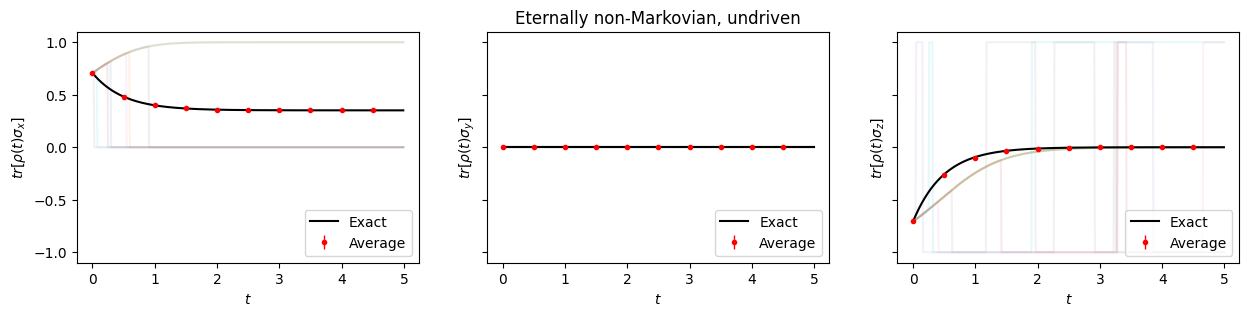

In [8]:
plot("Eternally non-Markovian, undriven")

Also works fine if we add a driving $H(t) = b(t)\sigma_z$

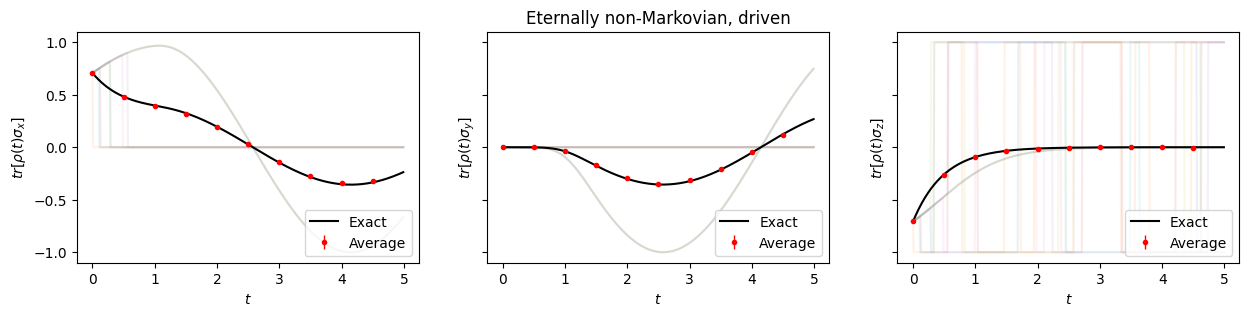

In [47]:
plot("Eternally non-Markovian, driven")

#### Different choices for $\mathbf C$
Note that when at the boundary of non-P divisibility ($\gamma_z=-\frac12\sqrt{\gamma_+\gamma_-}$), then the deterministiically-evolving initial state $|\psi^{det}(t)>$ can only jump to the ground state.
This is just an artifact of the particular choice of $\mu$. In fact, $\forall t$, $\forall\psi$, it's possible to pick any $\mu\in[\mu^{lb},\mu^{ub}]$ and I decided to pick $\mu=\mu^{ub}$. If, instead, $\mu=\mu^{lb}$, then the opposite is true: only jumps $|\psi>\mapsto|g>$ are possible.

The following is for the CP-divisible case $\gamma_-=1$, $\gamma_+=\gamma_z=0$, $|\psi_i>=|+>$.

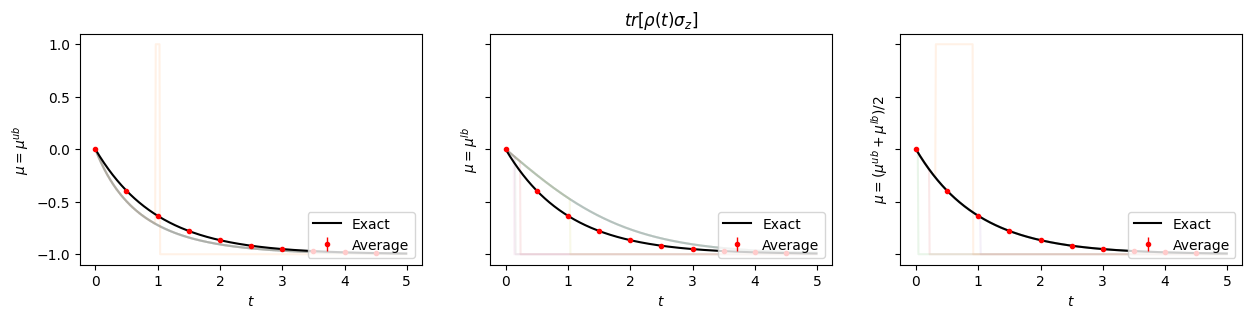

In [21]:
plot(r'$tr[\rho(t)\sigma_z]$', label0 = r'$\mu=\mu^{ub}$', label1 = r'$\mu=\mu^{lb}$', label2 = r'$\mu=(\mu^{ub} + \mu^{lb})/2$')

#### Time evolution of $\lVert\psi\rVert$  - eternally non-Markovian
Without the renormalization, $|\bar\psi(t)>\mapsto(1-i K dt)|\bar\psi(t)> = |\bar\psi(t+dt)>$, with $\lVert\bar\psi(t)\rVert\ne\lVert\bar\psi(t+dt)\rVert$.

Here the time evolution of $\lVert\bar\psi\rVert$ and of $p^{det}$, for $|\psi_1(0)>=|+>$,  $|\psi_2(0)>=\cos\frac\pi8|g>+\sin\frac\pi8|e>$, and $|\psi_3(0)>=\cos\frac\pi3|g>+\sin\frac\pi3|e>$.

Note: considering $|\bar\psi>$, $\mathbf C$ is still caclulated from the normalized vector $|\psi>$.

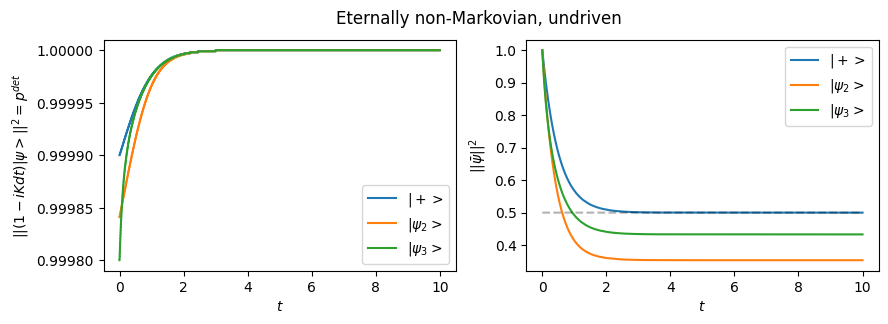

In [40]:
filein = open("params.txt")
ti = float(filein.readline())
tf = float (filein.readline())
dt = float(filein.readline())
Npoints = int((tf-ti)/dt)

t = np.arange(ti,tf,dt)

fig, ax = plt.subplots(1,2, figsize=(10,3))

plus = np.zeros(Npoints)
psi_2 = np.zeros(Npoints)
psi_3 = np.zeros(Npoints)
bar_p = np.zeros(Npoints)
bar_2 = np.zeros(Npoints)
bar_3 = np.zeros(Npoints)
f_plus = open("norm_plus.txt")
f_2 = open("norm_2.txt")
f_3 = open("norm_3.txt")
f_bar_plus = open("norm_bar_plus.txt")
f_bar_2 = open("norm_bar_2.txt")
f_bar_3 = open("norm_bar_3.txt")
for k in range(Npoints):
    plus[k] = f_plus.readline()
    psi_2[k] = f_2.readline()
    psi_3[k] = f_3.readline()
    bar_p[k] = f_bar_plus.readline()
    bar_2[k] = f_bar_2.readline()
    bar_3[k] = f_bar_3.readline()
    
ax[0].plot(t,plus, label=r'$|+>$')
ax[0].plot(t,psi_2, label=r'$|\psi_2>$')
ax[0].plot(t,psi_3, label=r'$|\psi_3>$')
ax[0].legend(loc="lower right")
ax[0].set_xlabel(r'$t$')  
ax[0].set_ylabel(r'$||(1-iK dt)|\psi>||^2 = p^{det}$')

ax[1].plot(t,bar_p, label=r'$|+>$')
ax[1].plot(t,bar_2, label=r'$|\psi_2>$')
ax[1].plot(t,bar_3, label=r'$|\psi_3>$')
ax[1].plot(t,np.zeros(Npoints)+.5, '--', color="black", alpha=.3)
ax[1].legend(loc="upper right")
ax[1].set_xlabel(r'$t$')  
ax[1].set_ylabel(r'$||\bar\psi||^2$')

plt.suptitle("Eternally non-Markovian, undriven")
plt.show();

## Non-P divisible case - reverse jumps
Let's consider a phase covariant which is non-P divisible, i.e. $\sqrt{\gamma_+(t)\gamma_-(t)}+2\gamma_z(t)<0$ at some times $t>0$. In particular I am using the model from Teittinen, _Entropy_ **2021**, 23, 331:
$$\gamma_+(t) = e^{-t/2},\qquad \gamma_-(t) = e^{-t/4},\qquad \gamma_z(t) = \frac\kappa2 e^{-\frac38t}\cos(2t),$$
which is non-P divisible for $\kappa \ge 1$. Here I use $\kappa=2$.

With the same state-dependant $\mathbf C$, it is also possible to implement reverse jumps. Here, for initial state $|\psi(0)> = \cos\frac\pi8|g>+\sin\frac\pi8|e>$. A reverse jump $|+>\mapsto|\psi^{det}(t)>$ happens for $t\approx 1.5$.

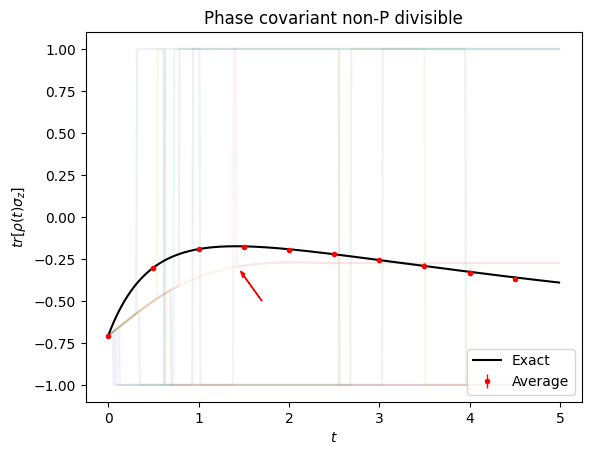

In [18]:
filein = open("../params.txt")
Ncopies = int(filein.readline())
Nensemble = int(filein.readline())
ti = float(filein.readline())
tf = float (filein.readline())
dt = float(filein.readline())
print_traj = bool(filein.readline())
Ntraj = int(filein.readline())
dimH = int(filein.readline())
Npoints = int((tf-ti)/dt)

t = np.arange(ti,tf,dt)

trajectories = np.zeros((Ntraj, Npoints))
exact = np.zeros(Npoints)
avg_obs = np.zeros(Npoints)
err_obs = np.zeros(Npoints)
if print_traj == True:
    filein = open("../trajectories.txt")
f_exact = open("../analytic.txt")
f_avg = open("../average.txt")
f_err = open("../error.txt")
for i in range(Npoints):
    exact[i] = f_exact.readline()
    avg_obs[i] = f_avg.readline()
    err_obs[i] = f_err.readline()
    if print_traj == True:
        j = 0
        line = filein.readline()
        for x in line.split():
            trajectories[j,i] = x
            j+=1
if print_traj == True:
    for i in range(Ntraj):
        plt.plot(t, trajectories[i,:], alpha=.1)
plt.plot(t,exact,color='black', label="Exact")
plt.errorbar(t,avg_obs,err_obs, marker='o', markersize=3, color='red', label="Average", errorevery=50, markevery=50, linewidth=0, elinewidth=1)

plt.legend(loc="lower right")
plt.xlabel(r'$t$')
plt.title("Phase covariant non-P divisible")
plt.ylabel(r'$tr[\rho(t)\sigma_z]$')

plt.arrow(1.7,-0.5,-0.2,0.15, head_width = .03, width = 0.001, color = "red")

plt.show()

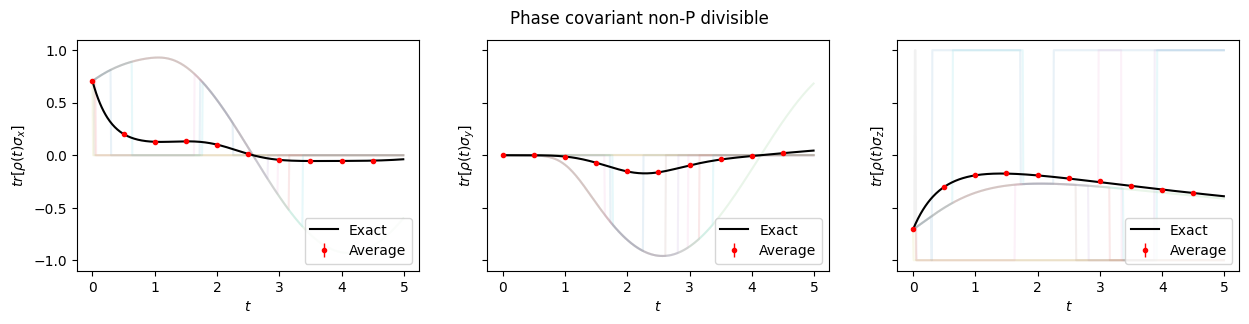

In [8]:
plot("Phase covariant non-P divisible")

#### Is it possible to extend the state-dependant ROQJ in the non-P divisible regime?
Suppose to violate P divisibility $$\gamma_z(t) = -\frac12\sqrt{\gamma_+(t)\gamma_-(t)}-\varepsilon(t),$$
is it still possible to find a $\mu$ such that $\mathbf R\ge 0$? The effect of $\varepsilon$ is that of shrinking the interval allowed for $\mu$ as $\mu\in[\mu^{lb}+2\varepsilon,\mu^{ub}-2\varepsilon]$.

For $\varepsilon$ sufficiently small, this interval always exists, unless $\mu^{ub}=\mu^{lb}$, which happens for
$$ \frac{\alpha^2(t)}{1-\alpha^2(t)}=\sqrt{\frac{\gamma_-(t)}{\gamma_+(t)}}, $$
where $\alpha(t) = <g|\psi^{det}(t)>$.
However, for this to happen, we must have that the trajectory of the deterministically evolving state matches that condition at some time $t$ such that P divisibility is violated.
It is not clear whether this condition is actually met by the deterministic trajectory: for example if the solution is for some $\alpha$ corresponding to a state close to the poles, but the deterministic state evolves towards the equator, then this deterministic state never matches the $\alpha$ satisfying that condition.

Here, a plot for the same example as before: the exact dynamics is reproduced, without the use of reverse jumps, chosing $\mu = \mu^{ub}-2\varepsilon$.

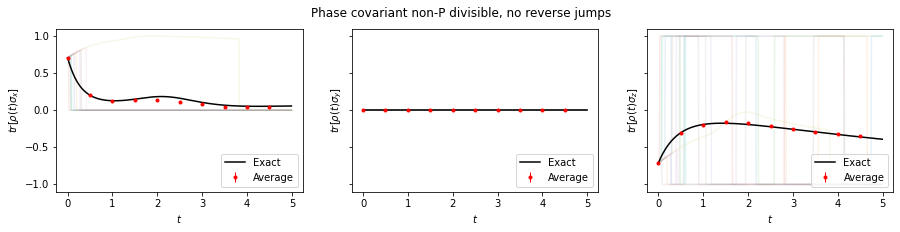

In [2]:
plot("Phase covariant non-P divisible, no reverse jumps")

Adding a driving $H\propto\sigma_z$

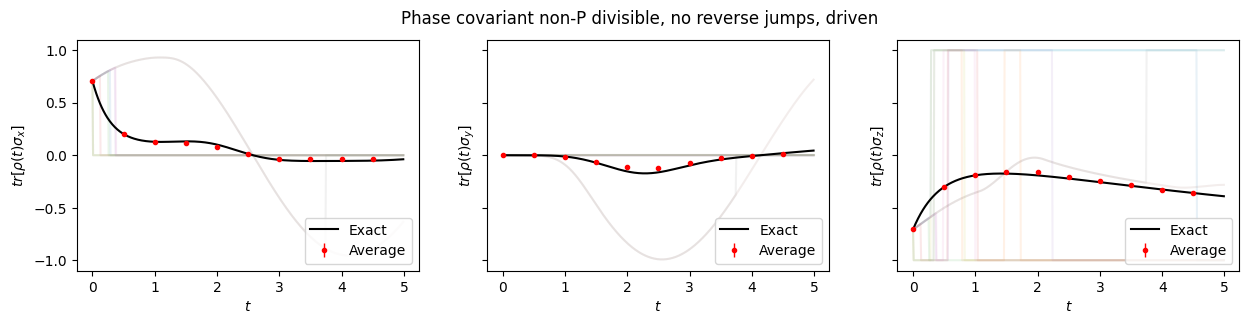

In [2]:
plot("Phase covariant non-P divisible, no reverse jumps, driven")

With a driving $H\propto\sigma_x$ it's not working - no idea why

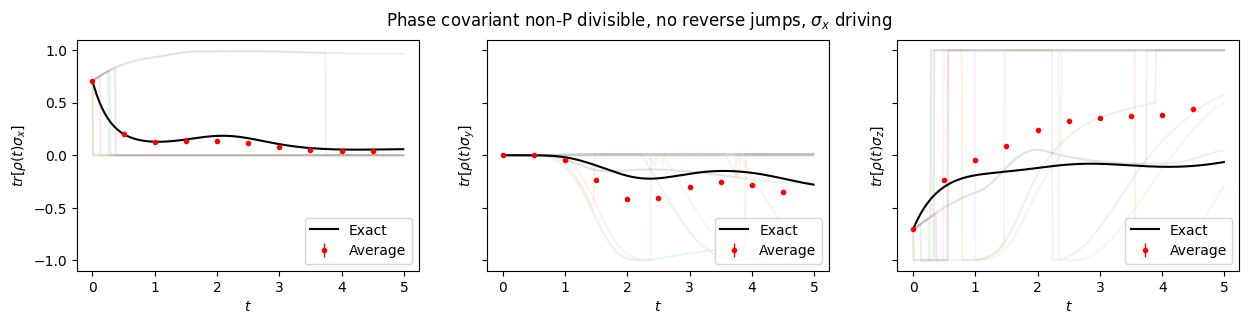

In [3]:
plot("Phase covariant non-P divisible, no reverse jumps, $\sigma_x$ driving")

### Two qubits
$$J = J_1\otimes J_1$$Using $\mathbf C = \mathbf C_1\otimes\mathbf C_1$ it seems to work only when using the state-independent $\mathbf C_1$, $\mathbf R\ge0$. The state-dependent one only works when dephasing only on one qubit: here evolving only one qubit: $J = J_1\otimes\mathbb 1$, $\mathbf C = \mathbf C_1\otimes\mathbb 1$.

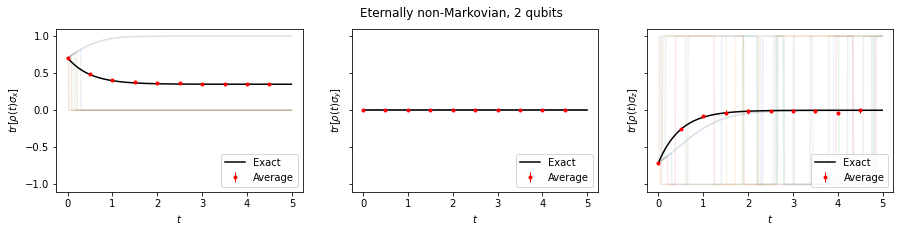

In [5]:
plot("Eternally non-Markovian, 2 qubits")

Considering the general evolution of both qubits with the same dynamics, $J = J_1\otimes J_1$, it only works for some particular states, e.g. $(|gg>+|ee>)/\sqrt2$ or $|+>|+>$. Here for $|+>|+>$. The rate operator is always positive, however the dynamics is different from the dynamis of one single qubit evolving, even if the two qubits are uncorrelated.

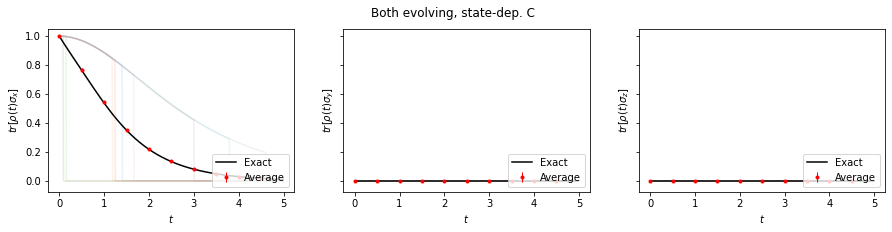

In [6]:
plot("Both evolving, state-dep. C")